In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

**I've run this notebook locally for the best dev experience**

# 💻 XYXY AI Technical Test - AI Research Engineer


Welcome! This short (2-3 hours) technical test is meant to assess your skills in data handling and deep learning. We're looking out for (in no particular order):
1. Problem scoping, big picture analysis, and clarity of thought;
2. Scientific approach: your ability to analyze and identify issues with data and perform reasonable analysis on failure cases;
3. Familiarity with training and testing deep learning models;
4. Code cleanliness and documentation.

## ⚙ Task Background
* Any resemblance to any organizations or real persons, living or dead, is purely coincidental.
* [Jack Sweeney](https://www.nytimes.com/2022/02/03/technology/elon-musk-jet-tracking.html), the Twitter kid that tracks Elon Musk and other celebs' flight activity, has decided to put on his big boy pants and run a startup that tackles geospatial analysis using deep learning.
* Jack realized that **real satellitea imagery is extremely expensive to acquire**, and the startup **would not be able to afford procuring, labeling, and processing** the massive amount of satellite imagery needed for deep learning (considering the general unlikelihood of aircraft appearances).
* Instead of training on expensive real data, Jack is testing out **xyxy** synthetic satellite imagery.

## 💬 Problem statement
* Help Jack make a decision on data strategy by **quantitatively comparing training with synthetic data against training entirely on real data.**
* Do this by training an object detection model that performs aircraft detection.

## 📦 Deliverables
* Write a **plan of action** describing how you would approach the problem. You are free to do a short literature review, research, and cite resources.
* **Implement the plan** with the provided resources.
* **Document** your steps, reasoning, and design decisions. Clarify anything with us if necessary (and also document that).

## 🎁 Provisions
* Model training code boilerplate (in this notebook)
* Data package containing the following:
    * xyxy synthetic training images and labels (~100MB, 2000 images)
    * RarePlanes real training images and labels (~2GB, 5815 images)
    * RarePlanes real test images and labels (-900MB, 2710 images)

## 🧪 Constraints
What can't you do? In general, this is a very permissive test: you may do anything as long as you abide by the following:
* You must include synthetic data in training.
* You may use any open source libraries or publicly available code, as long as you document their usage.
* If you have a wild but suspiciously sneaky idea, please check in with us and we'll give some advice. Keep in mind the test objectives at the top of this document.

## 👀 What We Expect
* **Don't focus on blindly grinding out model performance**. While it is important to show that synthetic data works, it is also valuable to understand specific cases where it **doesn't** (provide hypotheses and reasoning, and possible solutions).
* The deeper you can push analysis and insight on data, training, and evaluation, the better!
* You are free to use any model architecture. When choosing a model, document decisions about tradeoffs between performance and size/speed, keeping in mind development and training time.
* The model architecture and hyperparameter tuning are not very important. Use smaller models, reasonable baselines, transfer learning, or other tricks to spin up the training process as fast as possible.

# 🤫 More Hints
* `Runtime` > `Change runtime type` to use hardware accelerators.
* Perform exploratory data analysis (EDA) on the provided data and annotations. You may need to manipulate or fix the synthetic dataset's COCO JSON files.
* You may find it useful to define a quantitative performance metric (use and cite a standard open-source implementation) and visualize the distribution of failure cases.
* You are free to re-organize the real training and test datasets however you wish.

# 📐 Other Rules
* Please respect the integrity of the test! Do it yourself, and don't share it with anyone. Violating these may be grounds for disqualification.
* If you would like to complete the test locally (not on Colab), you may download the data [from this link (~3GB)](https://drive.google.com/file/d/1F6s079_J-J6xAEDC84kelmlW2gSHH-70/view?usp=sharing).
* Do contact the xyxy team in case you need additional clarifications!





```
-----------------------------
The test section begins here.
-----------------------------
```



# 📓 Action plan

This a stream of consciousness.

### Check with reality

Given the time line 2/3 hours is not possible to do a litterature review that is not a simple google/chatGPT question, therefore I will rely on what I know at this time.

Given the time line I am not sure how I can train and test different models, is not really important thus we will use the simpliest thing possibile in this world. 

Given the time line and the fact we are coding on jupyter, spaghetti code will be our friend today.

**My goal is to showcase a framework to check models' performances and generability**

### Please describe your approach here (double click to edit).
Feel free to use any additional resources if you like, e.g. external resources, slides, diagrams, images, or handwritten notes! But do link them here. While it should be technical, please make sure the plan written in this section is presentable and easily digestible.

### Before training

#### Step 1 Empirical Data Analysis

Images are made for human, first step is to sample some images from the real and the synthetic ones and empirically check that they makes sense. This is not scientific but it's a cheap and fast way to catch weird stuff - e.g. sythentic images do not contains planes

#### Step 2 Labels Distribution

We don't care about the real training split since we won't be using it, we want to check that labels distribution are comparable across sythetic images and real one. 
- check `num_boxes` distribution is similar to the real one
- check `classes` distribution is similar to the real one
- **very important** check `boxes_area` distribution is similar to the real one, if you use one of the old school methos with anchors this is even more important

#### Embeddings
We can check both datasets are semantically similar by embedding the data (or a statistical meaningful sample) by something like CLIP and assert the two embeddings space are somehow similar using similarity measures.

### After training

#### Metrics
We can evaluate the model's performance on the real test set, and see if they are on pair (or decent) with the train test. For object detection, we can use mAP and anything `>0.6` is a win for `iou>0.5`.
- we check failures at evaluation time, and we record them (e.g. FP).

Now, if the model performs well. We asserted our synthetic data does the job. If it doesn't, well we need to ping poing the issue. Good rule of thumb is before doing anything else, retrain the model with half the lr and more epoches and check that there is no overfitting and the loss curve is nice. If you are confident the model training is not the issue 

#### Augmentations
We can check that our model is robust by sampling the test set and run augmentation on it and record the model's performance and check if it drops.

#### Embeddings (again!)
We can take the backbone of our model, embed the train set and the real test set and check that they map two similar images in a similar spot.





# Download data package

In [2]:
# Select your runtime type: Runtime > Change runtime type

# Download data package with the synthetic train, real train, and real test sets (3GB, ETA ~1min)
# !gdown 1F6s079_J-J6xAEDC84kelmlW2gSHH-70
# !unzip -q -o technical_test_data_package.zip

# Data analysis

In [3]:
# Once downloaded and unzipped, the data is accessible at:
#   /content/synthetic_train,
#   /content/real_train, and
#   /content/real_test
# The corresponding COCO JSON labels are:
#   /content/synthetic_train_coco.json,
#   /content/real_train_coco.json,
#   /content/real_test_coco.json


# These boilerplate and helper functions are provided to help spin up a quick baseline.
# You are free to modify them or delete them and write your own.
# You may use any training framework or codebase.

import os
import torch

from PIL import Image
from tqdm.notebook import tqdm
from typing import Dict, List, Tuple

from torch import Tensor
from torch.optim import Adam
from torch.utils.data import Dataset, DataLoader

from torchvision.datasets import CocoDetection
from torchvision.models.detection import ssdlite320_mobilenet_v3_large
from torchvision.models.detection import SSDLite320_MobileNet_V3_Large_Weights
from torchvision.ops.boxes import box_convert
from torchvision.transforms import Compose, ToTensor
from torchvision.transforms.functional import to_pil_image
from torchvision.utils import draw_bounding_boxes, make_grid


# load the dataset
train_dataset = CocoDetection(
    root="synthetic_train",
    annFile="synthetic_train_coco.json",
    transform=Compose([ToTensor()]),
)

train_real_dataset = CocoDetection(
    root="real_train",
    annFile="real_train_coco.json",
    transform=Compose([ToTensor()]),
)


test_real_dataset = CocoDetection(
    root="real_test",
    annFile="real_test_coco.json",
    transform=Compose([ToTensor()]),
)


train_dataset[0]

loading annotations into memory...
Done (t=1.35s)
creating index...
index created!
loading annotations into memory...
Done (t=0.36s)
creating index...
index created!
loading annotations into memory...
Done (t=0.04s)
creating index...
index created!


(tensor([[[0.0706, 0.0706, 0.0667,  ..., 0.0863, 0.0863, 0.0863],
          [0.0627, 0.0706, 0.0706,  ..., 0.0863, 0.0863, 0.0863],
          [0.0549, 0.0667, 0.0745,  ..., 0.0863, 0.0863, 0.0863],
          ...,
          [0.0588, 0.0549, 0.0510,  ..., 0.2353, 0.0471, 0.0706],
          [0.0471, 0.0431, 0.0392,  ..., 0.2980, 0.0667, 0.0824],
          [0.0431, 0.0353, 0.0275,  ..., 0.3569, 0.1098, 0.1176]],
 
         [[0.0824, 0.0824, 0.0784,  ..., 0.0941, 0.0941, 0.0941],
          [0.0745, 0.0824, 0.0824,  ..., 0.0941, 0.0941, 0.0941],
          [0.0667, 0.0784, 0.0863,  ..., 0.0941, 0.0941, 0.0941],
          ...,
          [0.0863, 0.0824, 0.0784,  ..., 0.2392, 0.0510, 0.0745],
          [0.0745, 0.0706, 0.0667,  ..., 0.3020, 0.0706, 0.0863],
          [0.0706, 0.0627, 0.0549,  ..., 0.3608, 0.1137, 0.1216]],
 
         [[0.1569, 0.1569, 0.1451,  ..., 0.1412, 0.1412, 0.1412],
          [0.1490, 0.1569, 0.1490,  ..., 0.1412, 0.1412, 0.1412],
          [0.1333, 0.1451, 0.1529,  ...,

### Datasets Analysis

#### Empirical Dataset Visualization
Let's visualize the datasets, we have `7` classes, here copied and paste the annotation json from 

**Train real doesn't work, it cannot load some images** - maybe a bug from my side or in the annotation file, I will use the test one since I need to be fast

In [4]:
from ipywidgets import interact
import ipywidgets as widgets

name_to_ds = {
    "sythetic-train": train_dataset,
    "real-train": train_real_dataset,
    "real-test": test_real_dataset

}

@interact(start=widgets.IntSlider(min=0, max=len(train_dataset)- 1, step=16, value=0), dataset_name=list(name_to_ds.keys()))
def display_images(start: int, dataset_name: str):
    ds = name_to_ds[dataset_name]
    images = make_grid([ds[start + i][0] for i in range(start, start + 16)], nrow=8)
    display(to_pil_image(images).resize((1600, 400)))


interactive(children=(IntSlider(value=0, description='start', max=1999, step=16), Dropdown(description='datase…

`sythetic-train` contains impossible situations, an overview is given in the next table

| Issues       | Image        |
|--------------|--------------|
| Planes in impossible locations, in the sea | <img src="synthetic_train/00015.jpg" width="200px"/> |
| # in a forest | <img src="synthetic_train/01955.jpg" width="200px"/> |
| # on houses | <img src="synthetic_train/01902.jpg" width="200px"/> |
| Planes with different scales that is physical impossible | <img src="synthetic_train/01998.jpg" width="200px"/> | 

Since the goal is to detect the planes, even if we have sythetic data not representing the real world, this may work. However, the resulting model may not be robust.

We can also use `fiftyone` to visualize the data, be sure to have `ffmepg` as well - in my case `fiftyone` uses `mongodb` under the hood and it requires a specific version of `libcrypto.so.1.1` that to my understaind is hold and I won't install it on my daily OS. 

So let's spin up a mongo instances and pass a custom url to fiftyone instead, I don't like it a lot since I think is badly done and unstable but let's play with it.

In [5]:
# !pip install fiftyone
# !docker run --rm -d -p 27017:27017  mongo:latest
# !export FIFTYONE_DATABASE_URI="mongodb://localhost:27017"

In [6]:
# Don't work - results in `AttributeError: module 'fiftyone' has no attribute 'config'`
# import fiftyone as fo

# coco_dataset = fo.Dataset.from_dir(
#     dataset_dir=".",
#     dataset_type=fo.types.COCODetectionDataset,
#     data_path="synthetic_train/",
#     labels_path="synthetic_train_coco.json",
#     include_id=True,
# )

Looks like fiftyone won't start, I've added a message on the GitHub issues of people with the same error. No idea what is going on, don't care - we'll skip it.

#### Classes
Let's check the class names and be sure they are correct

In [7]:
def get_category_names(ds):
    coco = ds.coco
    category_names = {}
    for category in coco.loadCats(coco.getCatIds()):
        category_names[category["id"]] = category["name"]

    return category_names


get_category_names(train_dataset), get_category_names(test_real_dataset)

({1: 'Small Civil Transport',
  2: 'Military Transport',
  3: 'Medium Civil Transport',
  4: 'Large Civil Transport',
  5: 'Fighter',
  6: 'Military Trainer'},
 {1: 'Small Civil Transport/Utility',
  2: 'Medium Civil Transport/Utility',
  3: 'Large Civil Transport/Utility',
  4: 'Military Transport/Utility/AWAC',
  5: 'Military Bomber',
  6: 'Military Fighter/Interceptor/Attack',
  7: 'Military Trainer'})

In [8]:
def check_categories(fake_ds, real_ds):
    fake_category_names = get_category_names(fake_ds)
    real_category_names = get_category_names(real_ds)

    all_ids = max(len(fake_category_names), len(real_category_names))
    
    # + 1 cuz background class
    for i in range(1, all_ids + 1):        
        try:
            if fake_category_names[i] != real_category_names[i]:
                print(f"[ERROR] category id={i} differents from fake to real. {fake_category_names[i]} != {real_category_names[i]}")
        except KeyError:
            if i not in fake_category_names:
                print(f"[ERROR] category id={i} not in fake")

            if i not in real_category_names:
                print(f"[ERROR] category id={i} not in real")
            
        

check_categories(train_dataset, test_real_dataset)

[ERROR] category id=1 differents from fake to real. Small Civil Transport != Small Civil Transport/Utility
[ERROR] category id=2 differents from fake to real. Military Transport != Medium Civil Transport/Utility
[ERROR] category id=3 differents from fake to real. Medium Civil Transport != Large Civil Transport/Utility
[ERROR] category id=4 differents from fake to real. Large Civil Transport != Military Transport/Utility/AWAC
[ERROR] category id=5 differents from fake to real. Fighter != Military Bomber
[ERROR] category id=6 differents from fake to real. Military Trainer != Military Fighter/Interceptor/Attack
[ERROR] category id=7 not in fake


Yep, categories are wrong. Let's print them better


| category_id | fake                    | real                              |
|-------------|-------------------------|-----------------------------------|
| 1           | Small Civil Transport   | Small Civil Transport/Utility     |
| 2           | Military Transport      | Medium Civil Transport/Utility    |
| 3           | Medium Civil Transport  | Large Civil Transport/Utility     |
| 4           | Large Civil Transport   | Military Transport/Utility/AWAC   |
| 5           | Fighter                 | Military Bomber                   |
| 6           | Military Trainer        | Military Fighter/Interceptor/Attack|
| 7           |                         | Military Trainer                  |


We are missing one, `Military Trainer`. I'd assume we don't care about it, if we care there is nothing I can do just generate correct data. Okay, let's fix them 

In [9]:
train_dataset_categories_permutation = [0, 1, 4, 2, 3, 6, 7] # mapping the wrong category id to the correct one

Now keep in mind that we don't care about changing the labels now, we just need to keep in mind the ids predicted when trained on fake data are different and we can fix them at evaluation time. 

I am not really sure why wrong data were provided, but since I don't want to use more than 3hours for this challenge, I won't fix them.

#### Stats

Let's compute and visualize some stats, we'll do it the hard way

In [10]:
from dataclasses import dataclass
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
from typing import Optional
import pandas as pd

@dataclass
class DatasetStats:
    bbox_sizes: list
    bbox_aspect_ratios: list
    class_distribution: dict
    objects_per_image: list

    @classmethod
    def from_coco_dataset(cls, dataset: CocoDetection, categories_ids_permutation: Optional[list[int]] = None):
        bbox_sizes = []
        bbox_aspect_ratios = []
        class_distribution = defaultdict(int)
        objects_per_image = []
        bbox_sizes_clusters: dict

        for img, targets in dataset:
            img_area = img.shape[0] * img.shape[1]
            num_objects = 0
            for ann in targets:
                # Compute bounding box sizes
                bbox = ann["bbox"]
                area = bbox[2] * bbox[3] / img_area
                aspect_ratio = bbox[2] / bbox[3]
                bbox_sizes.append(area)
                bbox_aspect_ratios.append(aspect_ratio)
                
                if categories_ids_permutation is not None:
                    category_id = categories_ids_permutation[ann["category_id"]]
                else:
                    category_id = ann["category_id"]
                    
                class_distribution[category_id] += 1
                
                num_objects += 1

            objects_per_image.append(num_objects)
            
        return cls(bbox_sizes, bbox_aspect_ratios, class_distribution, objects_per_image)
    
    def plot(self, title=None, categories_labels=None):
        fig, axs = plt.subplots(2, 2, figsize=(15, 8))

        # Box plot for bounding box sizes
        axs[0, 0].boxplot(self.bbox_sizes)
        axs[0, 0].set_title("Bounding Box Sizes")
        axs[0, 0].set_ylabel("Size")

        # Box plot for bounding box aspect ratios
        axs[0, 1].boxplot(self.bbox_aspect_ratios)
        axs[0, 1].set_title("Bounding Box Aspect Ratios")
        axs[0, 1].set_ylabel("Aspect Ratio")

        # Bar plot for class distribution
        labels = list(self.class_distribution.keys())
        counts = list(self.class_distribution.values())
        if categories_labels:
            labels = [categories_labels.get(label, str(label)) for label in labels]
        axs[1, 0].bar(labels, counts)
        axs[1, 0].set_title("Class Distribution")
        axs[1, 0].set_xlabel("Class")
        axs[1, 0].set_ylabel("Frequency")

        # Histogram for objects per image
        axs[1, 1].hist(self.objects_per_image, bins='auto')
        axs[1, 1].set_title("Objects Per Image")
        axs[1, 1].set_xlabel("Number of Objects")
        axs[1, 1].set_ylabel("Frequency")


        return fig


This code is very vanilla, python is slow so keep that in mind

In [11]:
train_dataset_stats = DatasetStats.from_coco_dataset(train_dataset, train_dataset_categories_permutation)
test_real_dataset_stats = DatasetStats.from_coco_dataset(test_real_dataset)

<IPython.core.display.Javascript object>


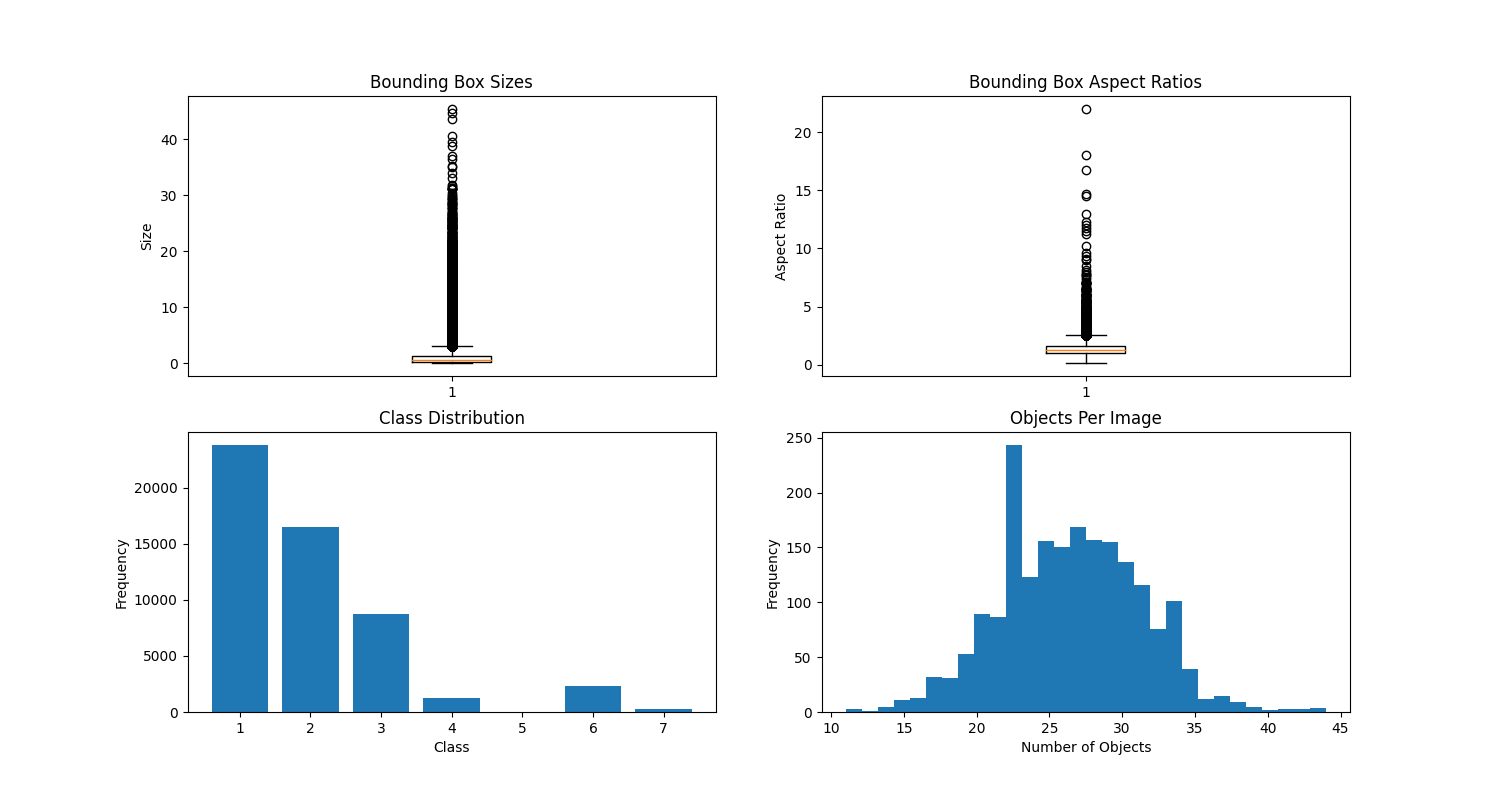

<IPython.core.display.Javascript object>


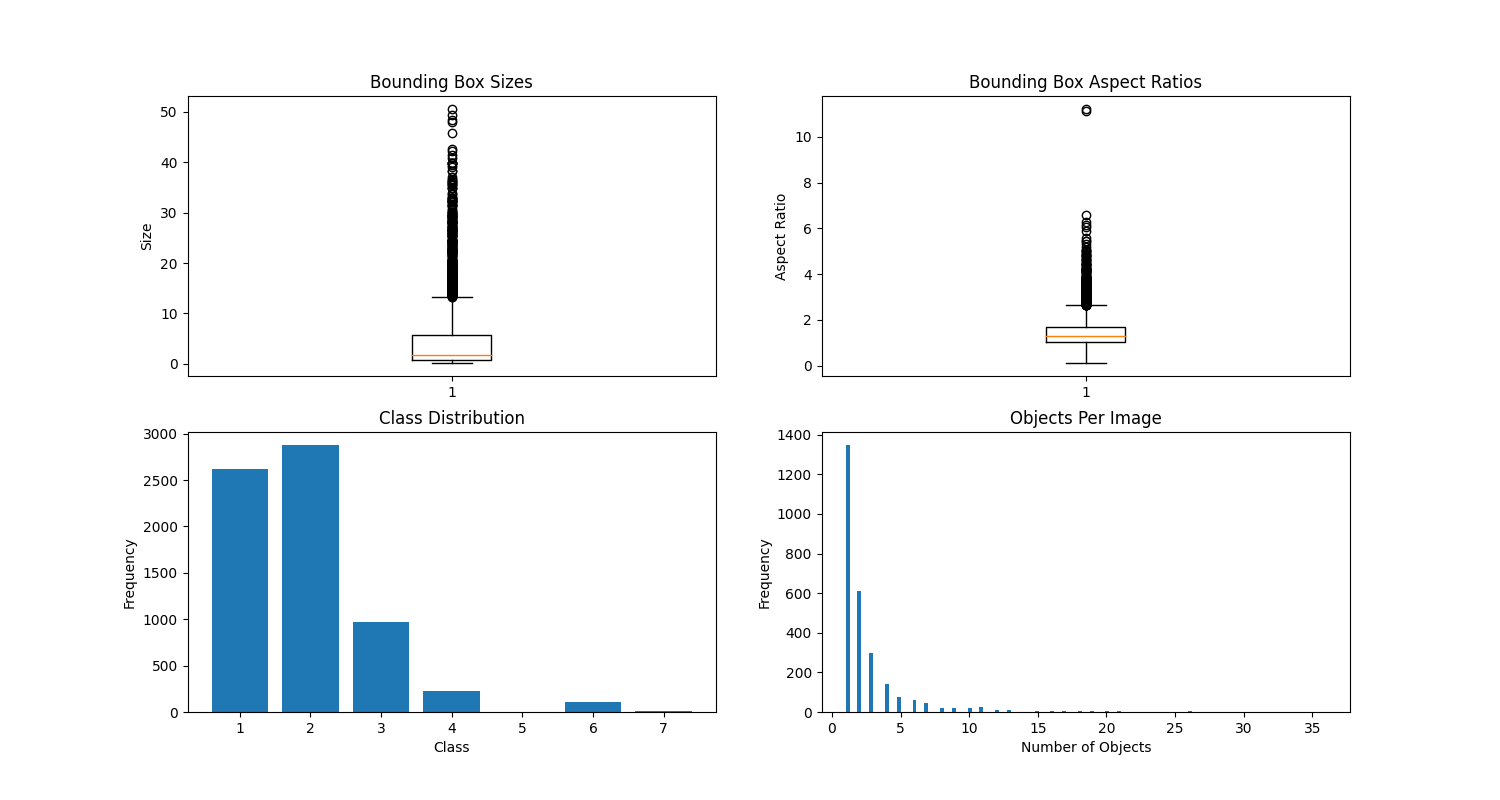

In [12]:
_ = train_dataset_stats.plot("Fake")
_ = test_real_dataset_stats.plot("Real")

Okay, here we can noticed a few things

- `fake` and `real` bboxes sizes are different, `fakes` has smaller bboxes on avg
- class distribution is okayish
- `fake` aspecet ratio is more or less double of real, this may cause issues if we use learned anchors methods
- the frequency of number of objects per image is very different, in real life the mostly have images with few items in them, while the one from `fake` looks sampled from a normal distribution.

## Embeddings

No time, skipped

# Implementation
For the sake of speed, I am gonna stick with this implementation. Notice that in real like data augmentation should be use. There are several ways:
- [torchvision now supports bboxes augs](https://pytorch.org/blog/extending-torchvisions-transforms-to-object-detection-segmentation-and-video-tasks/) 
- [albumentation](https://albumentations.ai/) is a good choice,but not really fast
- depending on the use case,one can run augmentation on GPU, I have a benchmark for that, you can find it [here](https://github.com/FrancescoSaverioZuppichini/detector/tree/feature/%234/benchmarks/transform) 
- [kornia](https://github.com/kornia/kornia) is also a choice, but it's slow since their transforms are differentiable 

Usually, using [lightning](https://github.com/Lightning-AI/lightning) is also a great choice

To evaluate it's better to use fast-coco-eval, however the torch vision utils I will be using don't work with it and I don't have time to debug it.

In [13]:
!pip install fast-coco-eval

Uncomment to use torch vision util

In [14]:
# !wget https://raw.githubusercontent.com/pytorch/vision/main/references/detection/coco_eval.py
# !wget https://raw.githubusercontent.com/pytorch/vision/main/references/detection/utils.py

We need `iscrown` set in the `json` file, I am not really sure why you are proving me with wrong dataset/annotation.

In [15]:
import ujson
from pathlib import Path

file_path = Path("real_test_coco_fixed.json")

if not file_path.exists():
    with open("real_test_coco.json", "r") as f:
        data = ujson.load(f)

        for annotation in data['annotations']:
            annotation['iscrowd'] = False
    with file_path.open("w") as f:
        modified_json_data = ujson.dump(data, f)

test_real_dataset = CocoDetection(
    root="real_test",
    annFile=str(file_path),
    transform=Compose([ToTensor()]),
)

loading annotations into memory...
Done (t=0.05s)
creating index...
index created!


Added `convert_model_predictions_to_coco`

In [18]:
from coco_eval import CocoEvaluator

def convert_annotations(targets: List[List[dict]], device: torch.device) -> List[dict]:
    """Converts CocoDetection targets to a torchvision-friendly format."""
    targets_list = list()
    for target in targets:
        boxes, labels = list(), list()
        for annotation in target:
            boxes.append(torch.tensor(annotation["bbox"]))
            labels.append(torch.tensor(annotation["category_id"]))
        boxes = torch.stack(boxes).to(device)
        boxes = box_convert(boxes, "xywh", "xyxy")
        labels = torch.stack(labels).to(device)
        targets_list.append({"boxes": boxes, "labels": labels})
    return targets_list


def convert_model_predictions_to_coco(predictions: List[Dict[str, Tensor]], targets: List[Dict[str, Tensor]]) -> Dict[str, Dict[str, Tensor]]:
    coco_predictions = {}
    images_ids = set()
    for target in targets:
        for annotation in target:
            images_ids.add(annotation['image_id'])  
    for prediction, images_id in zip(predictions, images_ids):            
        coco_predictions[images_id] = {
            "boxes" : prediction["boxes"],
            "scores": prediction["scores"],
            "labels": prediction["labels"],
            "iscrowd": False
            }
    return coco_predictions

def train(dataloader, model, optimizer, device) -> None:
    model.train()
    for batch in tqdm(dataloader):
        images, targets = zip(*batch)
        images = list(image.to(device) for image in images)
        targets = convert_annotations(targets, device)
        loss_dict = model(images, targets)
        losses = sum(loss for loss in loss_dict.values())
        print(losses)
        optimizer.zero_grad()
        losses.backward()
        optimizer.step()

@torch.no_grad()
def evaluate(dataloader, model, dataset, device):
    coco_evaluator = CocoEvaluator(dataset.coco, iou_types=["bbox"])
    model.eval()
    for batch in tqdm(dataloader):
        images, targets = zip(*batch)
        images = list(image.to(device) for image in images)
        converted_targets = convert_annotations(targets, device)
        predictions = model(images, converted_targets)
        coco_evaluator.update(convert_model_predictions_to_coco(predictions, targets))
    coco_evaluator.synchronize_between_processes()
    coco_evaluator.accumulate()
    coco_evaluator.summarize()

Start training, we will evaluate on test set because I don't have time to split train and val. In practice you'd use logging system (e.g. CometML etc) and proper way to setup the experiements, see this [playbook](https://github.com/google-research/tuning_playbook). Here we are basically playing without any scienfitic approach.

In [25]:
device = (
    torch.device("cuda")
    if torch.cuda.is_available()
    else torch.device("cpu")
)

# See https://pytorch.org/vision/stable/generated/torchvision.datasets.CocoDetection.html
train_dataset = CocoDetection(
    root="synthetic_train",
    annFile="synthetic_train_coco.json",
    transform=Compose([ToTensor()]),
    # not normalizing, I am assuming the model does that internally
)

train_dataloader = DataLoader(train_dataset, batch_size=64, num_workers=4, collate_fn=lambda x: x, shuffle=True)
test_dataloader = DataLoader(test_real_dataset, batch_size=32, num_workers=4, collate_fn=lambda x: x)


model = ssdlite320_mobilenet_v3_large(
    weights=SSDLite320_MobileNet_V3_Large_Weights.DEFAULT
)
model.to(device)

optimizer = Adam(model.parameters(), lr=1e-3)
num_epochs = 50

with torch.autocast("cuda", dtype=torch.float16):
    for epoch in range(num_epochs):
        train(train_dataloader, model, optimizer, device)
        if epoch % 5:
            evaluate(test_dataloader, model, test_real_dataset, device)
            torch.save( model.state_dict(), f"checkpoint-{epoch}.pt")

loading annotations into memory...
Done (t=1.56s)
creating index...
index created!


  0%|          | 0/32 [00:00<?, ?it/s]

tensor(13.2341, device='cuda:0', grad_fn=<AddBackward0>)
tensor(13.5009, device='cuda:0', grad_fn=<AddBackward0>)
tensor(12.9903, device='cuda:0', grad_fn=<AddBackward0>)
tensor(12.7108, device='cuda:0', grad_fn=<AddBackward0>)
tensor(12.3706, device='cuda:0', grad_fn=<AddBackward0>)
tensor(12.6294, device='cuda:0', grad_fn=<AddBackward0>)
tensor(12.4012, device='cuda:0', grad_fn=<AddBackward0>)
tensor(11.8474, device='cuda:0', grad_fn=<AddBackward0>)
tensor(11.6988, device='cuda:0', grad_fn=<AddBackward0>)
tensor(11.6771, device='cuda:0', grad_fn=<AddBackward0>)
tensor(11.6480, device='cuda:0', grad_fn=<AddBackward0>)
tensor(11.2109, device='cuda:0', grad_fn=<AddBackward0>)
tensor(11.3608, device='cuda:0', grad_fn=<AddBackward0>)
tensor(11.3193, device='cuda:0', grad_fn=<AddBackward0>)
tensor(10.9466, device='cuda:0', grad_fn=<AddBackward0>)
tensor(10.8807, device='cuda:0', grad_fn=<AddBackward0>)
tensor(10.6179, device='cuda:0', grad_fn=<AddBackward0>)
tensor(10.4164, device='cuda:0'

  0%|          | 0/32 [00:00<?, ?it/s]

tensor(8.7676, device='cuda:0', grad_fn=<AddBackward0>)
tensor(8.6651, device='cuda:0', grad_fn=<AddBackward0>)
tensor(8.4333, device='cuda:0', grad_fn=<AddBackward0>)
tensor(8.4131, device='cuda:0', grad_fn=<AddBackward0>)
tensor(8.3969, device='cuda:0', grad_fn=<AddBackward0>)
tensor(8.4633, device='cuda:0', grad_fn=<AddBackward0>)
tensor(8.1543, device='cuda:0', grad_fn=<AddBackward0>)
tensor(8.1107, device='cuda:0', grad_fn=<AddBackward0>)
tensor(7.6324, device='cuda:0', grad_fn=<AddBackward0>)
tensor(8.0594, device='cuda:0', grad_fn=<AddBackward0>)
tensor(7.7774, device='cuda:0', grad_fn=<AddBackward0>)
tensor(7.8782, device='cuda:0', grad_fn=<AddBackward0>)
tensor(7.4805, device='cuda:0', grad_fn=<AddBackward0>)
tensor(7.8816, device='cuda:0', grad_fn=<AddBackward0>)
tensor(7.8319, device='cuda:0', grad_fn=<AddBackward0>)
tensor(7.6473, device='cuda:0', grad_fn=<AddBackward0>)
tensor(7.3969, device='cuda:0', grad_fn=<AddBackward0>)
tensor(7.4320, device='cuda:0', grad_fn=<AddBack

  0%|          | 0/85 [00:00<?, ?it/s]

Accumulating evaluation results...
DONE (t=3.56s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.005
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.011
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.003
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.051
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.040
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.040
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.091
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.111
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.112
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.338
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= l

  0%|          | 0/32 [00:00<?, ?it/s]

tensor(6.3349, device='cuda:0', grad_fn=<AddBackward0>)
tensor(7.0323, device='cuda:0', grad_fn=<AddBackward0>)
tensor(6.5146, device='cuda:0', grad_fn=<AddBackward0>)
tensor(6.6910, device='cuda:0', grad_fn=<AddBackward0>)
tensor(6.9075, device='cuda:0', grad_fn=<AddBackward0>)
tensor(6.3362, device='cuda:0', grad_fn=<AddBackward0>)
tensor(6.5898, device='cuda:0', grad_fn=<AddBackward0>)
tensor(6.8941, device='cuda:0', grad_fn=<AddBackward0>)
tensor(6.3728, device='cuda:0', grad_fn=<AddBackward0>)
tensor(6.3843, device='cuda:0', grad_fn=<AddBackward0>)
tensor(6.4176, device='cuda:0', grad_fn=<AddBackward0>)
tensor(6.5042, device='cuda:0', grad_fn=<AddBackward0>)
tensor(6.5607, device='cuda:0', grad_fn=<AddBackward0>)
tensor(6.4937, device='cuda:0', grad_fn=<AddBackward0>)
tensor(6.5235, device='cuda:0', grad_fn=<AddBackward0>)
tensor(6.4589, device='cuda:0', grad_fn=<AddBackward0>)
tensor(5.9284, device='cuda:0', grad_fn=<AddBackward0>)
tensor(6.1837, device='cuda:0', grad_fn=<AddBack

  0%|          | 0/85 [00:00<?, ?it/s]

Accumulating evaluation results...
DONE (t=3.18s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.006
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.013
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.004
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.055
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.040
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.047
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.099
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.115
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.116
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.370
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= l

  0%|          | 0/32 [00:00<?, ?it/s]

tensor(5.9049, device='cuda:0', grad_fn=<AddBackward0>)
tensor(6.2574, device='cuda:0', grad_fn=<AddBackward0>)
tensor(5.9739, device='cuda:0', grad_fn=<AddBackward0>)
tensor(5.6164, device='cuda:0', grad_fn=<AddBackward0>)
tensor(5.8716, device='cuda:0', grad_fn=<AddBackward0>)
tensor(5.7306, device='cuda:0', grad_fn=<AddBackward0>)
tensor(5.9620, device='cuda:0', grad_fn=<AddBackward0>)
tensor(5.8157, device='cuda:0', grad_fn=<AddBackward0>)
tensor(5.7784, device='cuda:0', grad_fn=<AddBackward0>)
tensor(5.6442, device='cuda:0', grad_fn=<AddBackward0>)
tensor(5.8955, device='cuda:0', grad_fn=<AddBackward0>)
tensor(5.6084, device='cuda:0', grad_fn=<AddBackward0>)
tensor(5.7506, device='cuda:0', grad_fn=<AddBackward0>)
tensor(5.5285, device='cuda:0', grad_fn=<AddBackward0>)
tensor(5.7602, device='cuda:0', grad_fn=<AddBackward0>)
tensor(5.4694, device='cuda:0', grad_fn=<AddBackward0>)
tensor(5.4815, device='cuda:0', grad_fn=<AddBackward0>)
tensor(5.9151, device='cuda:0', grad_fn=<AddBack

  0%|          | 0/85 [00:00<?, ?it/s]

Accumulating evaluation results...
DONE (t=2.93s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.007
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.014
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.005
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.063
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.063
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.049
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.099
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.114
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.116
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.387
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= l

  0%|          | 0/32 [00:00<?, ?it/s]

tensor(5.5330, device='cuda:0', grad_fn=<AddBackward0>)
tensor(5.3865, device='cuda:0', grad_fn=<AddBackward0>)
tensor(5.4180, device='cuda:0', grad_fn=<AddBackward0>)
tensor(5.2744, device='cuda:0', grad_fn=<AddBackward0>)
tensor(5.2615, device='cuda:0', grad_fn=<AddBackward0>)
tensor(5.7215, device='cuda:0', grad_fn=<AddBackward0>)
tensor(5.1949, device='cuda:0', grad_fn=<AddBackward0>)
tensor(5.3559, device='cuda:0', grad_fn=<AddBackward0>)
tensor(5.3368, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.8975, device='cuda:0', grad_fn=<AddBackward0>)
tensor(5.2321, device='cuda:0', grad_fn=<AddBackward0>)
tensor(5.0943, device='cuda:0', grad_fn=<AddBackward0>)
tensor(5.3066, device='cuda:0', grad_fn=<AddBackward0>)
tensor(5.1567, device='cuda:0', grad_fn=<AddBackward0>)
tensor(5.2817, device='cuda:0', grad_fn=<AddBackward0>)
tensor(5.4495, device='cuda:0', grad_fn=<AddBackward0>)
tensor(5.2663, device='cuda:0', grad_fn=<AddBackward0>)
tensor(5.3867, device='cuda:0', grad_fn=<AddBack

  0%|          | 0/85 [00:00<?, ?it/s]

Accumulating evaluation results...
DONE (t=3.12s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.007
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.014
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.006
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.067
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.052
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.050
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.098
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.112
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.116
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.395
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= l

  0%|          | 0/32 [00:00<?, ?it/s]

tensor(4.9547, device='cuda:0', grad_fn=<AddBackward0>)
tensor(5.0005, device='cuda:0', grad_fn=<AddBackward0>)
tensor(5.0738, device='cuda:0', grad_fn=<AddBackward0>)
tensor(5.1769, device='cuda:0', grad_fn=<AddBackward0>)
tensor(5.0309, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.9036, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.8197, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.6237, device='cuda:0', grad_fn=<AddBackward0>)
tensor(5.0102, device='cuda:0', grad_fn=<AddBackward0>)
tensor(5.1025, device='cuda:0', grad_fn=<AddBackward0>)
tensor(5.0642, device='cuda:0', grad_fn=<AddBackward0>)
tensor(5.1039, device='cuda:0', grad_fn=<AddBackward0>)
tensor(5.0955, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.8095, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.8717, device='cuda:0', grad_fn=<AddBackward0>)
tensor(5.0783, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.7387, device='cuda:0', grad_fn=<AddBackward0>)
tensor(5.0090, device='cuda:0', grad_fn=<AddBack

  0%|          | 0/32 [00:00<?, ?it/s]

tensor(4.8389, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.9665, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.8864, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.7050, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.7645, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.8298, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.7605, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.7570, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.9372, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.8939, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.8344, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.7047, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.7330, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.7874, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.6296, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.6790, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.7382, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.6791, device='cuda:0', grad_fn=<AddBack

  0%|          | 0/85 [00:00<?, ?it/s]

Accumulating evaluation results...
DONE (t=2.67s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.009
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.018
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.009
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.081
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.050
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.051
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.105
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.117
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.125
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.397
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= l

  0%|          | 0/32 [00:00<?, ?it/s]

tensor(4.5186, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.5496, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.5310, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.3476, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.5717, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.6052, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.8617, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.3542, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.5595, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.4058, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.5867, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.3326, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.5691, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.7121, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.3930, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.4901, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.7312, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.3884, device='cuda:0', grad_fn=<AddBack

  0%|          | 0/85 [00:00<?, ?it/s]

Accumulating evaluation results...
DONE (t=2.61s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.009
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.019
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.009
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.088
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.073
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.052
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.105
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.118
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.126
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.409
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= l

  0%|          | 0/32 [00:00<?, ?it/s]

tensor(4.5230, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.5774, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.5845, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.4103, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.6081, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.3973, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.4759, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.4819, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.4655, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.5301, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.3001, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.2442, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.4163, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.6638, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.4217, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.1535, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.5552, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.4167, device='cuda:0', grad_fn=<AddBack

  0%|          | 0/85 [00:00<?, ?it/s]

Accumulating evaluation results...
DONE (t=2.69s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.008
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.017
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.007
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.088
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.072
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.051
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.104
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.118
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.127
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.398
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= l

  0%|          | 0/32 [00:00<?, ?it/s]

tensor(4.1911, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.3845, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.3163, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.3126, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.2919, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.3610, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.4963, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.4290, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.1270, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.3528, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.1584, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.4802, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.2243, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.2771, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.4207, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.2876, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.0425, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.3235, device='cuda:0', grad_fn=<AddBack

  0%|          | 0/85 [00:00<?, ?it/s]

Accumulating evaluation results...
DONE (t=2.55s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.008
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.016
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.007
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.088
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.060
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.051
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.106
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.119
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.129
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.391
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= l

  0%|          | 0/32 [00:00<?, ?it/s]

tensor(4.1987, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.2113, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.1914, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.1949, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.2335, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.3371, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.3280, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.2903, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.2873, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.1457, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.1178, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.0841, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.1173, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.2085, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.3576, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.2162, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.2287, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.9081, device='cuda:0', grad_fn=<AddBack

  0%|          | 0/32 [00:00<?, ?it/s]

tensor(4.1364, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.2813, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.2054, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.1723, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.0634, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.9977, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.0340, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.0959, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.2357, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.0534, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.2980, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.9651, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.1351, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.3203, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.8613, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.1778, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.1678, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.1123, device='cuda:0', grad_fn=<AddBack

  0%|          | 0/85 [00:00<?, ?it/s]

Accumulating evaluation results...
DONE (t=2.75s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.008
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.015
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.007
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.084
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.098
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.050
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.107
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.121
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.133
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.385
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= l

  0%|          | 0/32 [00:00<?, ?it/s]

tensor(4.1366, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.0962, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.0386, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.9848, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.0814, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.1938, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.9108, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.0201, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.0500, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.1695, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.1056, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.0755, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.9941, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.3741, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.8973, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.4022, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.0506, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.7891, device='cuda:0', grad_fn=<AddBack

  0%|          | 0/85 [00:00<?, ?it/s]

Accumulating evaluation results...
DONE (t=2.99s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.009
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.017
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.008
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.086
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.089
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.053
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.110
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.127
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.139
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.396
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= l

  0%|          | 0/32 [00:00<?, ?it/s]

tensor(4.2077, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.2183, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.0217, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.1222, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.7488, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.2382, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.7411, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.0783, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.0452, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.1128, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.0957, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.1360, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.1920, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.9957, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.9387, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.0526, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.9138, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.1339, device='cuda:0', grad_fn=<AddBack

  0%|          | 0/85 [00:00<?, ?it/s]

Accumulating evaluation results...
DONE (t=2.65s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.011
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.020
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.011
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.087
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.089
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.054
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.113
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.127
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.140
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.383
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= l

  0%|          | 0/32 [00:00<?, ?it/s]

tensor(4.1166, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.2954, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.9254, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.8719, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.9079, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.9954, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.9604, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.8229, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.8733, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.9121, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.8063, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.1340, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.0772, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.9122, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.1223, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.9327, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.8196, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.9162, device='cuda:0', grad_fn=<AddBack

  0%|          | 0/85 [00:00<?, ?it/s]

Accumulating evaluation results...
DONE (t=2.69s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.010
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.018
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.010
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.086
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.095
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.053
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.111
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.125
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.137
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.386
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= l

  0%|          | 0/32 [00:00<?, ?it/s]

tensor(3.8713, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.0742, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.9588, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.8952, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.9235, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.9345, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.9905, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.0279, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.8071, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.0770, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.8384, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.8666, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.7798, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.9212, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.8968, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.9123, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.0805, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.9889, device='cuda:0', grad_fn=<AddBack

  0%|          | 0/32 [00:00<?, ?it/s]

tensor(3.9692, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.9273, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.6958, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.8713, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.0504, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.9118, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.0462, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.9587, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.0840, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.8478, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.8550, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.0294, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.8678, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.7650, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.9129, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.6287, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.7552, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.8444, device='cuda:0', grad_fn=<AddBack

  0%|          | 0/85 [00:00<?, ?it/s]

Accumulating evaluation results...
DONE (t=2.62s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.011
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.020
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.012
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.089
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.071
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.054
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.115
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.130
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.144
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.371
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= l

  0%|          | 0/32 [00:00<?, ?it/s]

tensor(3.7883, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.6653, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.2797, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.8472, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.8340, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.8215, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.8052, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.9444, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.9311, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.6915, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.8614, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.9244, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.7893, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.6429, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.8920, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.6218, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.9550, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.9429, device='cuda:0', grad_fn=<AddBack

  0%|          | 0/85 [00:00<?, ?it/s]

Accumulating evaluation results...
DONE (t=2.67s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.012
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.021
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.012
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.090
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.081
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.054
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.115
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.131
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.143
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.377
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= l

  0%|          | 0/32 [00:00<?, ?it/s]

tensor(3.9270, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.8618, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.7176, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.0372, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.8313, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.0027, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.6597, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.8752, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.8983, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.8235, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.8275, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.7745, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.8080, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.8950, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.9631, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.6013, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.8109, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.6882, device='cuda:0', grad_fn=<AddBack

  0%|          | 0/85 [00:00<?, ?it/s]

Accumulating evaluation results...
DONE (t=2.87s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.011
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.021
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.012
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.092
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.098
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.054
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.115
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.134
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.145
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.390
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= l

  0%|          | 0/32 [00:00<?, ?it/s]

tensor(3.7552, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.8270, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.6921, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.0204, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.4971, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.0687, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.7963, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.7652, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.6574, device='cuda:0', grad_fn=<AddBackward0>)
tensor(4.0004, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.7988, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.9846, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.8118, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.7272, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.8635, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.7009, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.7723, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.8845, device='cuda:0', grad_fn=<AddBack

  0%|          | 0/85 [00:00<?, ?it/s]

Accumulating evaluation results...
DONE (t=2.89s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.011
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.021
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.011
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.084
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.093
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.051
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.112
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.128
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.142
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.362
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= l

  0%|          | 0/32 [00:00<?, ?it/s]

tensor(3.6531, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.7497, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.8178, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.8507, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.7699, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.9216, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.9016, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5056, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.8555, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.8311, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.7990, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.6999, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.6446, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.8135, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5875, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.8548, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.9087, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.9703, device='cuda:0', grad_fn=<AddBack

  0%|          | 0/32 [00:00<?, ?it/s]

tensor(3.9593, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.6195, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.7035, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5454, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.4912, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.8351, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.6846, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.7590, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.8883, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.9010, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.6729, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.7506, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.7794, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.7684, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.7652, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.7317, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.8004, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.7950, device='cuda:0', grad_fn=<AddBack

  0%|          | 0/85 [00:00<?, ?it/s]

Accumulating evaluation results...
DONE (t=2.82s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.012
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.022
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.012
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.083
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.102
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.050
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.112
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.128
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.143
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.362
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= l

  0%|          | 0/32 [00:00<?, ?it/s]

tensor(3.5357, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.6956, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.9017, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.7251, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.6172, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.6091, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.6678, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.6302, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.7646, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.7140, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.8351, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.7744, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.9983, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.6350, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.7709, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.6101, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.7472, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.8352, device='cuda:0', grad_fn=<AddBack

  0%|          | 0/85 [00:00<?, ?it/s]

Accumulating evaluation results...
DONE (t=2.98s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.011
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.021
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.011
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.084
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.110
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.050
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.112
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.130
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.144
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.369
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= l

  0%|          | 0/32 [00:00<?, ?it/s]

tensor(3.5660, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.8870, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.7104, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.6923, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.6768, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5291, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.9089, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.6300, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.6781, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5855, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5460, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.6184, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.4903, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.8817, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.4499, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.8339, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5476, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.7820, device='cuda:0', grad_fn=<AddBack

  0%|          | 0/85 [00:00<?, ?it/s]

Accumulating evaluation results...
DONE (t=2.96s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.012
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.022
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.012
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.083
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.090
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.049
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.110
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.127
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.143
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.368
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= l

  0%|          | 0/32 [00:00<?, ?it/s]

tensor(3.8395, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5528, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.7681, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.7850, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.7678, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.7226, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.6944, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.8195, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.7495, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.8867, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.7650, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.6979, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.6727, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5372, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.7326, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5649, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.6918, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5436, device='cuda:0', grad_fn=<AddBack

  0%|          | 0/85 [00:00<?, ?it/s]

Accumulating evaluation results...
DONE (t=2.88s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.012
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.021
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.011
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.083
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.079
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.049
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.110
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.129
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.143
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.363
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= l

  0%|          | 0/32 [00:00<?, ?it/s]

tensor(3.6419, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.6590, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.6740, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5128, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.7071, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.7789, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.3805, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.6492, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5887, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.6104, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5231, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5812, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5488, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.6917, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.6212, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.8315, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.6253, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.7512, device='cuda:0', grad_fn=<AddBack

  0%|          | 0/32 [00:00<?, ?it/s]

tensor(3.7236, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.4556, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5361, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.6918, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.8011, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.8443, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5918, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.7363, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.4658, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.6194, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.7506, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.4038, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5947, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.6890, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.8425, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.7083, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5962, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5849, device='cuda:0', grad_fn=<AddBack

  0%|          | 0/85 [00:00<?, ?it/s]

Accumulating evaluation results...
DONE (t=2.94s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.012
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.022
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.013
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.084
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.096
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.050
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.111
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.130
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.145
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.365
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= l

  0%|          | 0/32 [00:00<?, ?it/s]

tensor(3.5015, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5494, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.6541, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5999, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.2867, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5016, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.6309, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5926, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.7688, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.4733, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5545, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.6641, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.6833, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.6049, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.8326, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.7718, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.6501, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.6591, device='cuda:0', grad_fn=<AddBack

  0%|          | 0/85 [00:00<?, ?it/s]

Accumulating evaluation results...
DONE (t=3.21s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.012
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.022
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.013
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.085
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.069
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.050
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.111
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.132
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.147
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.362
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= l

  0%|          | 0/32 [00:00<?, ?it/s]

tensor(3.4132, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.6242, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.4958, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.7248, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.6980, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.6296, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.9159, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.6663, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.7838, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.4940, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5521, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.4172, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.8030, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.6182, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5412, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.4696, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.6120, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.7112, device='cuda:0', grad_fn=<AddBack

  0%|          | 0/85 [00:00<?, ?it/s]

Accumulating evaluation results...
DONE (t=2.84s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.012
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.023
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.013
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.086
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.086
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.051
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.112
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.130
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.144
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.356
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= l

  0%|          | 0/32 [00:00<?, ?it/s]

tensor(3.5961, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.7004, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.6304, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.3666, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.6037, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.6172, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5421, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.4338, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.6730, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5701, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5244, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.4312, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.6404, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.4326, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.7291, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.6935, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5528, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5279, device='cuda:0', grad_fn=<AddBack

  0%|          | 0/85 [00:00<?, ?it/s]

Accumulating evaluation results...
DONE (t=3.17s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.012
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.022
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.012
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.087
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.053
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.052
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.113
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.133
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.149
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.364
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= l

  0%|          | 0/32 [00:00<?, ?it/s]

tensor(3.5643, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.3856, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.7395, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.8396, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.4597, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.2157, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.7514, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.4211, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.7962, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.6508, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.6272, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5454, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5360, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5580, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5384, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.7705, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.6989, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5244, device='cuda:0', grad_fn=<AddBack

  0%|          | 0/32 [00:00<?, ?it/s]

tensor(3.5003, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.4204, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.4440, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.7602, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.4220, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.7480, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.3998, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.6291, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.4413, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5018, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.4950, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.6041, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5827, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.4800, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.7044, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.4297, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5157, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.6857, device='cuda:0', grad_fn=<AddBack

  0%|          | 0/85 [00:00<?, ?it/s]

Accumulating evaluation results...
DONE (t=2.63s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.012
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.022
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.013
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.082
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.078
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.050
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.108
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.125
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.139
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.340
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= l

  0%|          | 0/32 [00:00<?, ?it/s]

tensor(3.4672, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5405, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.7335, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5051, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5093, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.6048, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.7078, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.4556, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5162, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5981, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.4752, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.8324, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5478, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5022, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.4006, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.3234, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5325, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.7327, device='cuda:0', grad_fn=<AddBack

  0%|          | 0/85 [00:00<?, ?it/s]

Accumulating evaluation results...
DONE (t=3.22s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.012
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.022
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.013
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.085
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.087
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.049
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.110
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.131
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.146
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.354
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= l

  0%|          | 0/32 [00:00<?, ?it/s]

tensor(3.5044, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.4435, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5601, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.7483, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5650, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5194, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5265, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5419, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.4617, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.3753, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.4201, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.4983, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5939, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.4372, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5053, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.7348, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.6295, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.4288, device='cuda:0', grad_fn=<AddBack

  0%|          | 0/85 [00:00<?, ?it/s]

Accumulating evaluation results...
DONE (t=3.02s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.012
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.022
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.013
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.081
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.090
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.047
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.105
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.126
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.142
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.335
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= l

  0%|          | 0/32 [00:00<?, ?it/s]

tensor(3.6135, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5035, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.6257, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5452, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.4337, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.4897, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.4789, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.3338, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.6410, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5641, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5594, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.2995, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.4698, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.4530, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5280, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5946, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.3092, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.6411, device='cuda:0', grad_fn=<AddBack

  0%|          | 0/85 [00:00<?, ?it/s]

Accumulating evaluation results...
DONE (t=3.05s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.012
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.022
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.012
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.084
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.082
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.049
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.109
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.129
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.142
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.346
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= l

  0%|          | 0/32 [00:00<?, ?it/s]

tensor(3.5547, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5270, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.6015, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.4249, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.7126, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.6535, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.4040, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5388, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5561, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.4400, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.4903, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.3045, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.2822, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.7557, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.4773, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5843, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.4856, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.4520, device='cuda:0', grad_fn=<AddBack

  0%|          | 0/32 [00:00<?, ?it/s]

tensor(3.5691, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5631, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.4536, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.3289, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.4052, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.4235, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5712, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.3551, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.3738, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.6370, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.6809, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5868, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5701, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.4338, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.3340, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.2714, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.4102, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5658, device='cuda:0', grad_fn=<AddBack

  0%|          | 0/85 [00:00<?, ?it/s]

Accumulating evaluation results...
DONE (t=3.03s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.013
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.024
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.014
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.090
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.060
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.051
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.115
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.134
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.150
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.354
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= l

  0%|          | 0/32 [00:00<?, ?it/s]

tensor(3.3826, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.4126, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.6876, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5230, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.4049, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5714, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.4571, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.6035, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.3394, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5670, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.4351, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5625, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.4797, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.4264, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.6240, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.3388, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.6286, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5141, device='cuda:0', grad_fn=<AddBack

  0%|          | 0/85 [00:00<?, ?it/s]

Accumulating evaluation results...
DONE (t=3.16s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.012
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.022
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.012
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.084
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.078
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.049
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.110
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.130
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.145
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.332
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= l

  0%|          | 0/32 [00:00<?, ?it/s]

tensor(3.4345, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.3227, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.3453, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.4734, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.3476, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.4318, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5297, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5613, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.4347, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.6536, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.3851, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5999, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.4653, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.3730, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.2508, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.4594, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5783, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5824, device='cuda:0', grad_fn=<AddBack

  0%|          | 0/85 [00:00<?, ?it/s]

Accumulating evaluation results...
DONE (t=2.86s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.013
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.023
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.013
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.084
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.086
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.049
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.110
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.129
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.144
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.333
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= l

  0%|          | 0/32 [00:00<?, ?it/s]

tensor(3.4542, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5076, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.3834, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.4587, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5546, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.7010, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.4340, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.4212, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.2996, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5427, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5101, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.3571, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.3584, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.3726, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.4423, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.3290, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.4973, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.3539, device='cuda:0', grad_fn=<AddBack

  0%|          | 0/85 [00:00<?, ?it/s]

Accumulating evaluation results...
DONE (t=3.01s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.013
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.023
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.013
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.086
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.063
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.050
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.109
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.129
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.145
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.330
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= l

  0%|          | 0/32 [00:00<?, ?it/s]

tensor(3.4938, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.4489, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.4798, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.3630, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.4618, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.4866, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.3103, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.4267, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.3665, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.6227, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5068, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.4677, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.3727, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.3240, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.4200, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.3734, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.3683, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5237, device='cuda:0', grad_fn=<AddBack

  0%|          | 0/32 [00:00<?, ?it/s]

tensor(3.5827, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.4427, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.6069, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.1776, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.1659, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.3678, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.3282, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.4952, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.2048, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.3698, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5175, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.4699, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5216, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.4919, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.2652, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5462, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.4535, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.3924, device='cuda:0', grad_fn=<AddBack

  0%|          | 0/85 [00:00<?, ?it/s]

Accumulating evaluation results...
DONE (t=3.09s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.014
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.025
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.014
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.087
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.065
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.051
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.112
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.133
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.149
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.336
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= l

  0%|          | 0/32 [00:00<?, ?it/s]

tensor(3.4322, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.4402, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.2469, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5447, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.4471, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.2966, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.3780, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5850, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.2298, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5938, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.4189, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5358, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5029, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.3145, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5975, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5333, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.3689, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5127, device='cuda:0', grad_fn=<AddBack

  0%|          | 0/85 [00:00<?, ?it/s]

Accumulating evaluation results...
DONE (t=2.88s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.013
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.024
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.013
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.084
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.083
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.050
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.109
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.127
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.142
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.314
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= l

  0%|          | 0/32 [00:00<?, ?it/s]

tensor(3.3703, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.3831, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.3553, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.4422, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5235, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.2468, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5235, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.4412, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5759, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.3699, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.3873, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.4943, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.4261, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.6707, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5205, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.3711, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.2589, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5507, device='cuda:0', grad_fn=<AddBack

  0%|          | 0/85 [00:00<?, ?it/s]

Accumulating evaluation results...
DONE (t=3.07s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.012
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.022
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.013
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.082
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.103
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.048
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.105
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.125
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.137
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.316
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= l

  0%|          | 0/32 [00:00<?, ?it/s]

tensor(3.3774, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.3978, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.2523, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.4684, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.3893, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.3213, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.3067, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.3972, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.6381, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.3797, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.2908, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.4468, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5899, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.3926, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.1401, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.3101, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5507, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.3256, device='cuda:0', grad_fn=<AddBack

  0%|          | 0/85 [00:00<?, ?it/s]

Accumulating evaluation results...
DONE (t=3.11s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.013
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.024
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.014
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.085
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.081
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.051
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.109
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.129
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.143
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.322
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= l

  0%|          | 0/32 [00:00<?, ?it/s]

tensor(3.2029, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.3938, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.3619, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.2346, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5991, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.3341, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5192, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.3953, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.4160, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.4756, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.3046, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.2828, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.3767, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.3688, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.2509, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.3840, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.4921, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5605, device='cuda:0', grad_fn=<AddBack

  0%|          | 0/32 [00:00<?, ?it/s]

tensor(3.3434, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.2078, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.3810, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.3961, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.3415, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.4677, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.3577, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.3480, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.6458, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.3262, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.3018, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.4113, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.2813, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5723, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.3356, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.1997, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.4718, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.3460, device='cuda:0', grad_fn=<AddBack

  0%|          | 0/85 [00:00<?, ?it/s]

Accumulating evaluation results...
DONE (t=3.04s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.013
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.023
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.013
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.085
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.108
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.050
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.107
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.127
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.141
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.313
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= l

  0%|          | 0/32 [00:00<?, ?it/s]

tensor(3.4180, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.2933, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.4025, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.4622, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.4596, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.2683, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.2485, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.2747, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.4140, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.3206, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.3693, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.4389, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.1098, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.6591, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5198, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.4429, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.3736, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.2786, device='cuda:0', grad_fn=<AddBack

  0%|          | 0/85 [00:00<?, ?it/s]

Accumulating evaluation results...
DONE (t=2.88s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.013
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.023
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.014
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.086
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.105
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.050
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.108
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.126
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.140
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.307
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= l

  0%|          | 0/32 [00:00<?, ?it/s]

tensor(3.2990, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5038, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.3058, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.6641, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5605, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.4184, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.3216, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.2792, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.1979, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.3041, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.4696, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.4359, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5624, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.3648, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.1588, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.3691, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.3996, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.4588, device='cuda:0', grad_fn=<AddBack

  0%|          | 0/85 [00:00<?, ?it/s]

Accumulating evaluation results...
DONE (t=3.24s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.013
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.023
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.014
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.087
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.106
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.049
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.108
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.130
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.143
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.319
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= l

  0%|          | 0/32 [00:00<?, ?it/s]

tensor(3.3490, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5052, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.4741, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.3496, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.2215, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.4023, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.4622, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.3324, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.3558, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.3149, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.3964, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.5740, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.1963, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.3755, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.3684, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.2429, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.4277, device='cuda:0', grad_fn=<AddBackward0>)
tensor(3.3576, device='cuda:0', grad_fn=<AddBack

  0%|          | 0/85 [00:00<?, ?it/s]

Accumulating evaluation results...
DONE (t=3.25s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.012
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.022
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.013
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.086
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.100
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.049
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.108
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.129
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.143
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.315
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= l

```
Accumulating evaluation results...
DONE (t=3.25s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.012
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.022
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.013
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.086
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.100
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.049
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.108
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.129
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.143
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.315
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
```

Not very good isn't it? Before randomly train we should setup a configuration file to change important parts of the pipeline (augmentation and lr basically), train for 3 seeds and record performances - then we can draw meaningfull insights. 

Even before that, you should setup experiements to determine the correct range of hyperparameters (lr is the most important) but assuming you have augmentation you should check if you can reduce model's regularization.

Now what you would like to do is to train on the `real_train_data` and check performances. I don't have time to do it. Btw this pipeline is higly inneficient since it takes forever on my 3090. Poor man notebook copy and paste: 

**This doesn't, the train data seems to have wrong labels** 

Assuming this is my fault, I don't have to time to debug this. Assuming this is the data provider fault, please create a correct dataset.

In [28]:
train_dataloader = DataLoader(train_real_dataset, batch_size=64, num_workers=4, collate_fn=lambda x: x, shuffle=True)


model = ssdlite320_mobilenet_v3_large(
    weights=SSDLite320_MobileNet_V3_Large_Weights.DEFAULT
)
model.to(device)

optimizer = Adam(model.parameters(), lr=1e-3)
num_epochs = 50

with torch.autocast("cuda", dtype=torch.float16):
    for epoch in range(num_epochs):
        train(train_dataloader, model, optimizer, device)
        if epoch % 5:
            evaluate(test_dataloader, model, test_real_dataset, device)
            torch.save( model.state_dict(), f"checkpoint-real-{epoch}.pt")

  0%|          | 0/91 [00:00<?, ?it/s]

FileNotFoundError: Caught FileNotFoundError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/home/zuppif/miniconda3/envs/dl/lib/python3.9/site-packages/torch/utils/data/_utils/worker.py", line 308, in _worker_loop
    data = fetcher.fetch(index)
  File "/home/zuppif/miniconda3/envs/dl/lib/python3.9/site-packages/torch/utils/data/_utils/fetch.py", line 51, in fetch
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/home/zuppif/miniconda3/envs/dl/lib/python3.9/site-packages/torch/utils/data/_utils/fetch.py", line 51, in <listcomp>
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/home/zuppif/miniconda3/envs/dl/lib/python3.9/site-packages/torchvision/datasets/coco.py", line 48, in __getitem__
    image = self._load_image(id)
  File "/home/zuppif/miniconda3/envs/dl/lib/python3.9/site-packages/torchvision/datasets/coco.py", line 41, in _load_image
    return Image.open(os.path.join(self.root, path)).convert("RGB")
  File "/home/zuppif/miniconda3/envs/dl/lib/python3.9/site-packages/PIL/Image.py", line 3131, in open
    fp = builtins.open(filename, "rb")
FileNotFoundError: [Errno 2] No such file or directory: 'real_train/31_104001002809DA00_tile_178.png'


In [ ]:
# The following code is provided to sanity check your outputs,
# but does not perform quantitative evaluation.

def draw_annotation_on_image(image: Tensor, annotation: dict, color: str) -> Tensor:
    image = (image * 255.).type(torch.uint8)
    labels = [f"{l.item()}" for l in annotation["labels"]]
    if "scores" in annotation.keys():
        labels = [
            f"{x} {round(s.item(), 2)}"
            for x, s in zip(labels, annotation["scores"])
        ]
    return draw_bounding_boxes(
        image,
        boxes=annotation["boxes"],
        labels=labels,
        colors=color,
    )


def filter_prediction_by_score(
    prediction: Dict[str, Tensor],
    score_threshold: float,
) -> Dict[str, Tensor]:
    mask = prediction["scores"] >= score_threshold
    boxes = prediction["boxes"][mask]
    labels = prediction["labels"][mask]
    scores = prediction["scores"][mask]
    return {"boxes": boxes, "labels": labels, "scores": scores}


def visualize_batch_predictions(
    images: List[Tensor],
    targets: List[Dict[str, Tensor]],
    predictions: List[Dict[str, Tensor]],
    score_threshold: float = 0,
) -> Image:
    zipped = zip(images, targets, predictions)
    image_list = list()
    for image, target, prediction in zipped:
        image = (image * 255.).type(torch.uint8)
        prediction = filter_prediction_by_score(prediction, score_threshold)
        if len(target["boxes"]) > 0:
            image = draw_annotation_on_image(image, target, "#00FF00") # GTs in green
        if len(prediction["boxes"]) > 0:
            image = draw_annotation_on_image(image, prediction, "#FF00FF") # Preds in magenta
        image_list.append(image)
    return to_pil_image(make_grid(image_list, nrow=4))


def test(dataloader, model, device) -> None:
    model.eval()
    for batch in tqdm(dataloader):
        images, targets = zip(*batch)
        images = list(image.to(device) for image in images)
        targets = convert_annotations(targets, device)
        predictions = model(images, targets)
        display(visualize_batch_predictions(images, targets, predictions, score_threshold=0.5))
        break # Remove this to run on all batches

test_dataset = CocoDetection(
    root="/content/real_test",
    annFile="/content/real_test_coco.json",
    transform=Compose([ToTensor()]),
)
test_dataloader = DataLoader(test_dataset, batch_size=8, num_workers=2, collate_fn=lambda x: x)
test(test_dataloader, model, device)

## After Training Anylisis

### Stats
Check MAP and try to get MAP per class, these metrics should give you good highlights of model's failures (if any)

### Empirical Visualisation

At this point, you can empirical visualize the prediction. To have a very fast idea of what is going on.

### K Fold Cross Validation

You should use [k-fold cross validation](https://scikit-learn.org/stable/modules/cross_validation.html).

### Model's robustness

Perform different test time augmentation to check model's robustness. Pseudo code

```
load model trained

augmentations = [Blur(), ToGrey(), ...]

for aug in augmentations:
    sample batch from test set
    augment it
    record model's predictions
    evaluate model's predictions
    store evaluation result
    check variantion from previous evaluation
    if it's worst, record it and tell the user
    
```

**Time is up, I've dedicated more than 3 hours on this challange and since this is free work I am doing, I need to respect my time. Thanks a lot for this opportunity.**